# Clustering Customer Segmentation

Hints
Machine Learning Clustering
* Tujuan dari pembuatan model machine learning ini
adalah untuk dapat membuat cluster
customer-customer yang mirip
* Data cleansing terlebih dahulu, merubah tipe data
supaya sesuai
* Data merge untuk menggabungkan semua data
* Membuat data baru untuk clustering, yaitu groupby by
customerID lalu yang di aggregasi adalah :
    - Transaction id count
    - Qty sum
    - Total amount sum
* Menggunakan metode clustering KMeans
* Untuk proses queri data, dapat memilih alternatif
pemrograman yang sesuai preferensi kamu.
* Sedangkan untuk proses machine learning, Kamu
diperbolehkan memilih dan menggunakan satu bahasa
pemrograman di antara R dan Python untuk
membantumu mengerjakan Final Project.
* (Untuk Proses Queri Database) Pengumpulan tugas
dalam bentuk format file SQL script yang berisi
perintah-perintah SQL secara berurutan yang nantinya
dapat dieksekusi untuk memperoleh hasil yang
diinginkan

In [74]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt   
import seaborn as sns  
%matplotlib inline  
import sketch
import plotly.express as px
pd.set_option('display.max_columns', 50)


In [25]:
data = pd.read_csv('./data./Transaction.csv', sep=';', parse_dates=['Date'], dayfirst=True)

Data tidak perlu di bersihkan karena dataset ini sudah bersih

In [32]:
df_model = data.groupby('CustomerID')[['TransactionID', 'Qty', 'TotalAmount']].agg({'TransactionID':'count', 'Qty':'sum', 'TotalAmount':'sum'}).reset_index()

In [33]:
df_model.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [35]:
df_model['CustomerID'].nunique()

447

Total customer sebanyak 447 customer

# Clustering using Skicit learn

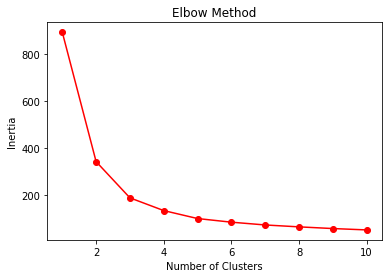

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Check for missing values and handle them accordingly
df_model.dropna(inplace=True)

features = ['Qty', 'TotalAmount']
# Normalize your data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model[features].values)

inertias = [KMeans(n_clusters=i).fit(scaled_data).inertia_ for i in range(1, 11)]

plt.plot(range(1, 11), inertias, 'o-r')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

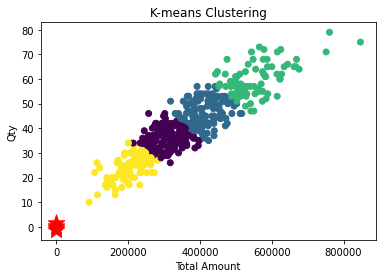

In [66]:
kmeans = KMeans(n_clusters=4, random_state=0, init='random')

kmeans.fit(scaled_data)

df_model['Cluster_label'] = kmeans.labels_

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# plot the centroids on a scatter plot
plt.scatter(df_model.loc[:, 'TotalAmount'].values, df_model.loc[:, 'Qty'].values, c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red')
plt.title('K-means Clustering')
plt.xlabel('Total Amount')
plt.ylabel('Qty')
plt.show()

In [62]:
df_model['Cluster_label'] = df_model['Cluster_label'].apply(lambda x: f'Cluster {x}')

In [63]:
df_model.head()

,CustomerID,TransactionID,Qty,TotalAmount,Cluster_label
0,1,17,60,623300,Cluster 2
1,2,13,57,392300,Cluster 1
2,3,15,56,446200,Cluster 1
3,4,10,46,302500,Cluster 0
4,5,7,27,268600,Cluster 3


In [67]:
df_model.Cluster_label.unique()

array([2, 1, 0, 3])

ada 4 jenis customer yang kita klusterkan

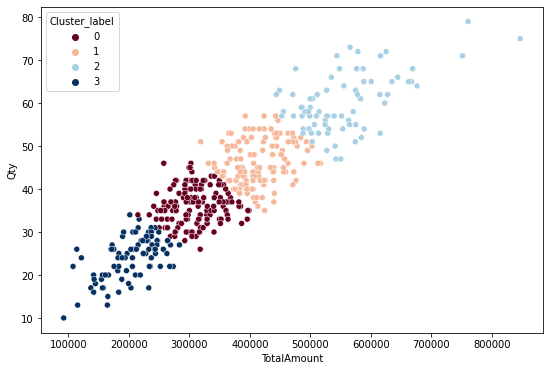

In [73]:
sns.scatterplot(data=df_model, x='TotalAmount', y='Qty', hue='Cluster_label', palette='RdBu')
plt.gcf().set_size_inches(9, 6)
plt.show()

In [75]:
fig = px.scatter(df_model, x='TotalAmount', y='Qty', color='Cluster_label', title='Clustering Customer Segmentation', template='plotly_dark')
fig.show()

# Using Pycaret clustering

In [97]:
pycaret_model = df_model = data.groupby('CustomerID')[['TransactionID', 'Qty', 'TotalAmount']].agg({'TransactionID':'count', 'Qty':'sum', 'TotalAmount':'sum'}).reset_index()

In [98]:
from pycaret.clustering import *
s = setup(pycaret_model[features].copy(), normalize=True, use_gpu=True, session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(447, 2)"
2,Transformed data shape,"(447, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [99]:
pycaret_kmeans = create_model('kmeans')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [100]:
print(pycaret_kmeans)

KMeans(n_clusters=4, random_state=123)


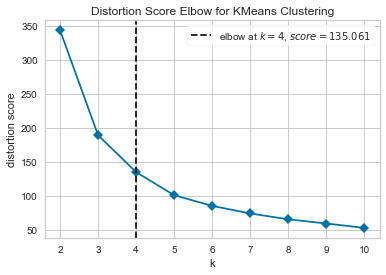

In [101]:
plot_model(pycaret_kmeans, plot='elbow')

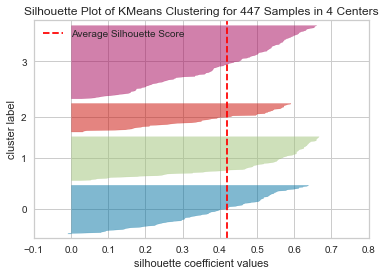

In [102]:
plot_model(pycaret_kmeans, plot='silhouette')

In [103]:
models = df_model = data.groupby('CustomerID')[['TransactionID', 'Qty', 'TotalAmount']].agg({'TransactionID':'count', 'Qty':'sum', 'TotalAmount':'sum'}).reset_index()

In [104]:
pycaret_prediction = predict_model(pycaret_kmeans, data=models)

In [106]:
pycaret_model['Cluster'] = pycaret_prediction['Cluster']
pycaret_model.head()

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,Cluster 2
1,2,13,57,392300,Cluster 0
2,3,15,56,446200,Cluster 0
3,4,10,46,302500,Cluster 3
4,5,7,27,268600,Cluster 1


In [108]:
fig = px.scatter(pycaret_prediction, x='TotalAmount', y='Qty', color='Cluster', title='Clustering Customer Segmentation', template='plotly_dark')
fig.show()

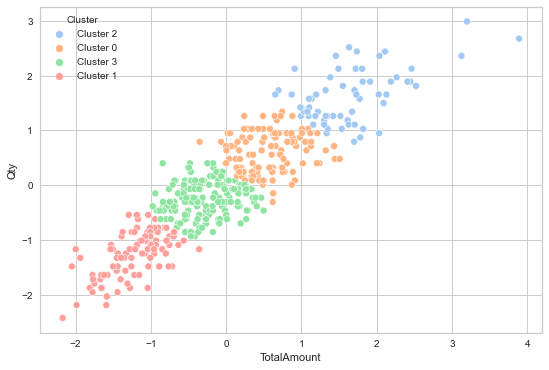

In [112]:
sns.scatterplot(data=pycaret_prediction, x='TotalAmount', y='Qty', hue='Cluster', palette='pastel')
plt.gcf().set_size_inches(9, 6)
plt.show()